# Proyecto ds4a EDA

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt
from   sklearn.metrics       import r2_score

%matplotlib inline
sns.set()

In [2]:
import json
import requests
import os
import datetime

## Weather analysis

we relate precipIntensity values to the severity of accidents

In [3]:
accidents_All=pd.read_csv('/home/bibianamolina/DS4A-traffic-project-master/data/dataset_clean.csv',sep=',')
accidents_All.columns

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density', 'summary',
       'precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed',
       'cloudCover', 'uvIndex', 'visibility', 'windBearing', 'windGust',
       'pressure', 'ozone'],
      dtype='object')

### correlation matrix

/home/bibianamolina/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


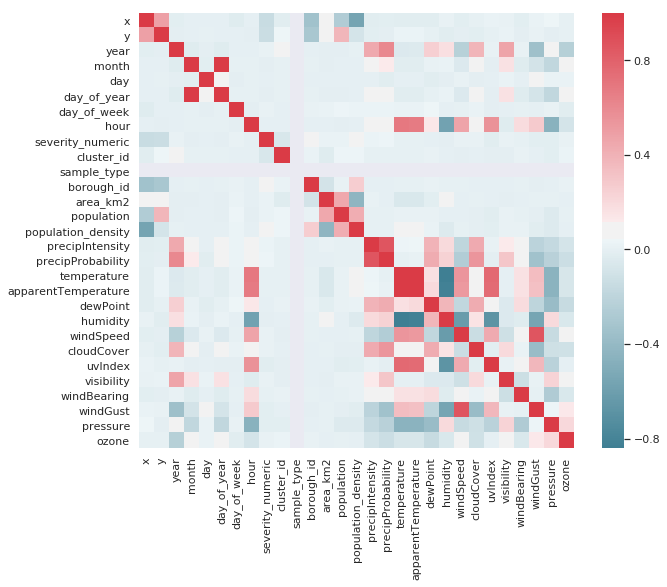

In [4]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = accidents_All.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

### distributions for continuous variables

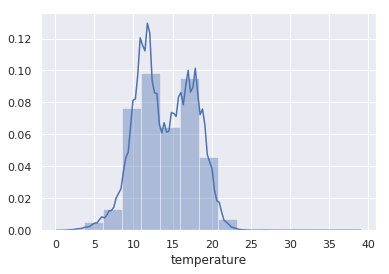

In [5]:
x = pd.Series(accidents_All['temperature'][accidents_All['temperature'].notnull()], name="temperature")
ax = sns.distplot(x, hist=True,bins=15)

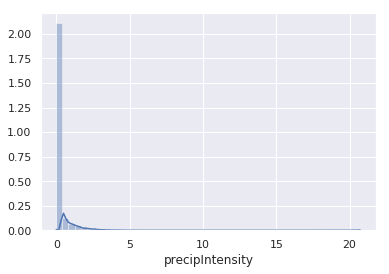

In [6]:
x = pd.Series(accidents_All['precipIntensity'][accidents_All['precipIntensity'].notnull()], name="precipIntensity")
ax = sns.distplot(x, hist=True)

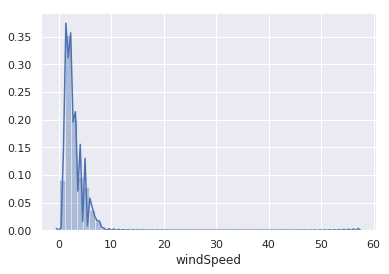

In [7]:
x = pd.Series(accidents_All['windSpeed'][accidents_All['windSpeed'].notnull()], name="windSpeed")
ax = sns.distplot(x, hist=True)

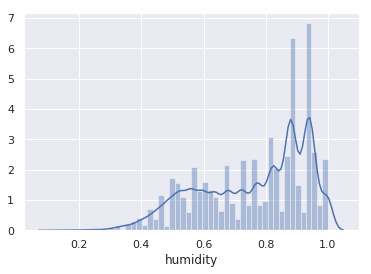

In [8]:
import pandas as pd
x = pd.Series(accidents_All['humidity'][accidents_All['humidity'].notnull()], name="humidity")
ax = sns.distplot(x, hist=True)

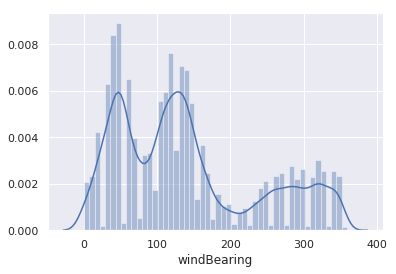

In [9]:
import pandas as pd
x = pd.Series(accidents_All['windBearing'][accidents_All['windBearing'].notnull()], name="windBearing")
ax = sns.distplot(x, hist=True)

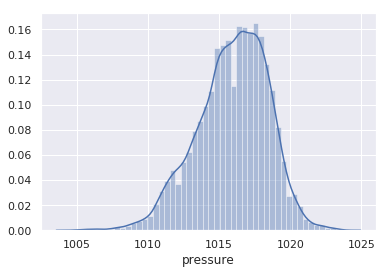

In [10]:
import pandas as pd
x = pd.Series(accidents_All['pressure'][accidents_All['pressure'].notnull()], name="pressure")
ax = sns.distplot(x, hist=True)

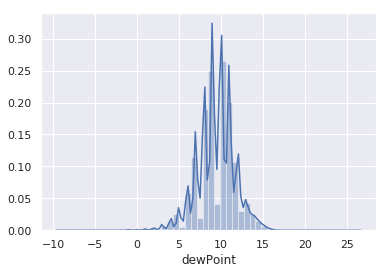

In [11]:
import pandas as pd
x = pd.Series(accidents_All['dewPoint'][accidents_All['dewPoint'].notnull()], name="dewPoint")
ax = sns.distplot(x, hist=True)

## Space-time analysis

### by year and month 

In [12]:
by_year=accidents_All['year'].value_counts(sort=True).rename_axis('year').reset_index(name='Total').sort_values(by='year').reset_index(drop=True)
by_year

,year,Total
0,2015,30426
1,2016,33921
2,2017,34097
3,2018,33112
4,2019,29067


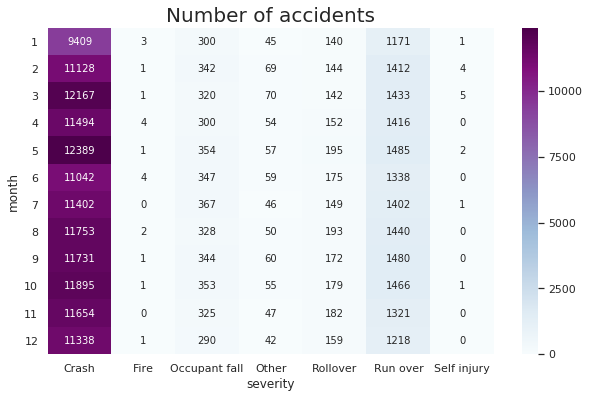

In [13]:
day_sev = pd.crosstab(accidents_All.month, accidents_All.accident_type)
fig = plt.figure(figsize=(10,6))
map1 = sns.heatmap(day_sev, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('severity')
plt.ylabel('month')
plt.yticks(rotation=0)
plt.show()

In [14]:
cross = accidents_All[['year', 'accident_type','population']].groupby(['year', 'accident_type']).count().reset_index()
cross

,year,accident_type,population
0,2015,Crash,25541
1,2015,Fire,1
2,2015,Occupant fall,811
3,2015,Other,154
4,2015,Rollover,286
5,2015,Run over,3628
6,2015,Self injury,5
7,2016,Crash,29104
8,2016,Fire,1
9,2016,Occupant fall,847


In [15]:
cross_severity_y = accidents_All[['year', 'severity','population']].groupby(['year', 'severity']).count().reset_index()
cross_severity_y

,year,severity,population
0,2015,Fatality,529
1,2015,Injury,10314
2,2015,Material damage,19583
3,2016,Fatality,565
4,2016,Injury,10227
5,2016,Material damage,23129
6,2017,Fatality,537
7,2017,Injury,10012
8,2017,Material damage,23548
9,2018,Fatality,499


In [16]:
summary=pd.DataFrame(accidents_All.accident_type.value_counts()).reset_index(drop=False)
summary.columns=['type','accidents']
summary

,type,accidents
0,Crash,137402
1,Run over,16582
2,Occupant fall,3970
3,Rollover,1982
4,Other,654
5,Fire,19
6,Self injury,14


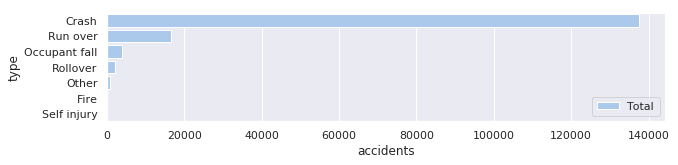

In [17]:
f, ax = plt.subplots(figsize=(10, 2))

sns.set_color_codes("pastel")
sns.barplot(x="accidents", y='type', data=summary,
            label="Total", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)

In [18]:
accidents_All.columns

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density', 'summary',
       'precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed',
       'cloudCover', 'uvIndex', 'visibility', 'windBearing', 'windGust',
       'pressure', 'ozone'],
      dtype='object')

In [19]:
y_temperature=accidents_All[['year','temperature']].groupby('year').agg(['mean','max','min'])#.reset_index(drop=True)
y_temperature.columns=['mean','max','min']
y_temperature

,mean,max,min
year,,,
2015,14.158686,28.03,2.19
2016,14.354792,33.98,1.28
2017,14.008842,38.00,1.18
2018,13.812491,27.01,1.67
2019,13.873506,21.91,5.98


In [20]:
cross_severity_m = accidents_All[['month', 'severity','population']].groupby(['month', 'severity']).count().reset_index()
cross_severity_m.columns=['month', 'severity','accidents']

In [21]:
cross = accidents_All[['accident_type', 'severity','population']].groupby(['accident_type', 'severity']).count().reset_index()
cross

,accident_type,severity,population
0,Crash,Fatality,1110
1,Crash,Injury,30596
2,Crash,Material damage,105696
3,Fire,Injury,3
4,Fire,Material damage,16
5,Occupant fall,Fatality,32
6,Occupant fall,Injury,3920
7,Occupant fall,Material damage,18
8,Other,Fatality,7
9,Other,Injury,599


In [22]:
months={1:'January',2:'February',3:'March',4:'April',
       5:'May',6:'June',7:'July',8:'August',
       9:'September',10:'October',11:'November',12:'December'}

In [23]:
cross_severity_m['months']=cross_severity_m['month'].apply(lambda x: months[x])

In [24]:
cross_severity_m

,month,severity,accidents,months
0,1,Fatality,175,January
1,1,Injury,3661,January
2,1,Material damage,7233,January
3,2,Fatality,205,February
4,2,Injury,4296,February
5,2,Material damage,8599,February
6,3,Fatality,208,March
7,3,Injury,4590,March
8,3,Material damage,9340,March
9,4,Fatality,216,April


In [25]:
by_month=accidents_All['month'].value_counts(sort=True).rename_axis('month').reset_index(name='accident_count').sort_values(by='month').reset_index(drop=True)
months={1:'January',2:'February',3:'March',4:'April',
        5:'May',6:'June',7:'July',8:'August',
        9:'September',10:'October',11:'November',12:'December'}
by_month['months']=list(months.values())

## Exploratory data analysis

In [26]:
accidents_All=pd.read_csv('/home/bibianamolina/DS4A-traffic-project-master/data/dataset_clean.csv',sep=',')
accidents_All.columns

Index(['x', 'y', 'timestamp', 'date', 'year', 'month', 'day', 'day_of_year',
       'day_of_week', 'hour', 'address', 'severity', 'accident_type',
       'severity_numeric', 'borough', 'cluster_id', 'sample_type',
       'borough_id', 'area_km2', 'population', 'population_density', 'summary',
       'precipIntensity', 'precipProbability', 'temperature',
       'apparentTemperature', 'dewPoint', 'humidity', 'windSpeed',
       'cloudCover', 'uvIndex', 'visibility', 'windBearing', 'windGust',
       'pressure', 'ozone'],
      dtype='object')

In [27]:
accidents_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160623 entries, 0 to 160622
Data columns (total 36 columns):
x                      160623 non-null float64
y                      160623 non-null float64
timestamp              160623 non-null object
date                   160623 non-null object
year                   160623 non-null int64
month                  160623 non-null int64
day                    160623 non-null int64
day_of_year            160623 non-null int64
day_of_week            160623 non-null int64
hour                   160623 non-null int64
address                160623 non-null object
severity               160623 non-null object
accident_type          160623 non-null object
severity_numeric       160623 non-null int64
borough                160623 non-null object
cluster_id             160623 non-null int64
sample_type            160623 non-null int64
borough_id             160623 non-null int64
area_km2               160623 non-null float64
population            

In [28]:
#### accidents and weather
summary=pd.DataFrame(accidents_All.summary.value_counts()).reset_index(drop=False)
summary.columns=['weather','accidents']       
summary

,weather,accidents
0,Mostly Cloudy,62845
1,Partly Cloudy,55250
2,Possible Light Rain,10327
3,Overcast,9917
4,Clear,8814
5,Rain,1458
6,Foggy,1304
7,Possible Drizzle,602
8,Humid and Partly Cloudy,14
9,Dangerously Windy and Mostly Cloudy,11


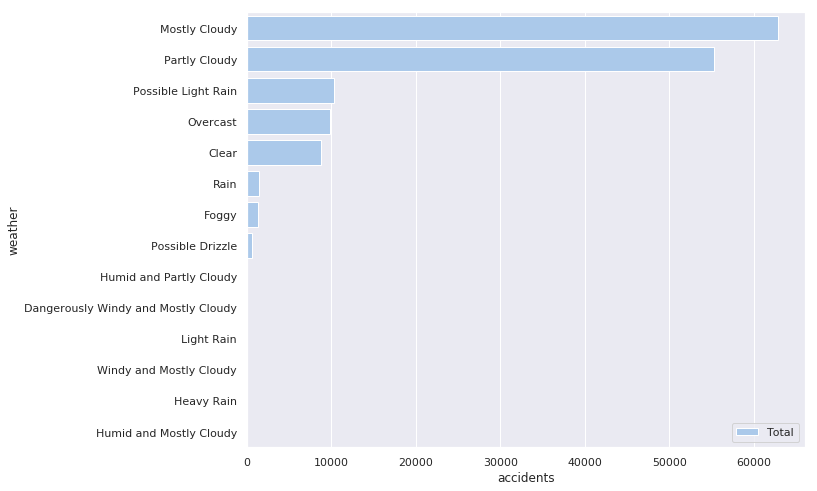

In [29]:
f, ax = plt.subplots(figsize=(10, 8))

sns.set_color_codes("pastel")
sns.barplot(x="accidents", y='weather', data=summary,
            label="Total", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)

In [30]:
#### calculated mean tempeture by month
m_temperature=accidents_All[['month','temperature']].groupby('month').agg(['mean','max','min'])#.reset_index(drop=True)
m_temperature.columns=['mean','max','min']              
m_temperature

,mean,max,min
month,,,
1,13.590798,23.92,1.18
2,14.182278,27.01,2.03
3,14.447495,24.00,3.04
4,14.377852,22.03,2.72
5,14.456883,24.00,5.71
6,13.994585,26.98,5.44
7,13.826399,27.00,5.17
8,13.795901,38.00,4.18
9,13.912274,33.98,3.04


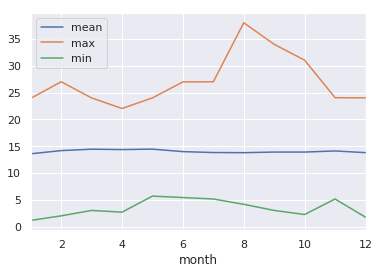

In [31]:
m_temperature.plot()

In [32]:
#### calculated mean tempeture by year
y_temperature=accidents_All[['year','temperature']].groupby('year').agg(['mean','max','min'])#.reset_index(drop=True)
y_temperature.columns=['mean','max','min']
y_temperature

,mean,max,min
year,,,
2015,14.158686,28.03,2.19
2016,14.354792,33.98,1.28
2017,14.008842,38.00,1.18
2018,13.812491,27.01,1.67
2019,13.873506,21.91,5.98


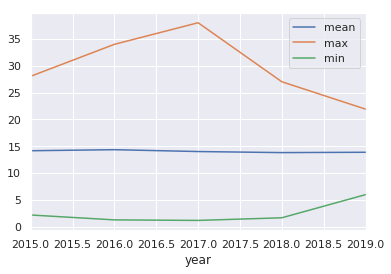

In [33]:
y_temperature.plot()

In [34]:
#### calculated mean precipIntensity by month

m_precipIntensity=accidents_All[['month','precipIntensity']].groupby('month').agg(['mean','max','min'])
m_precipIntensity.columns=['mean','max','min']
m_precipIntensity

,mean,max,min
month,,,
1,0.100656,4.4669,0.0
2,0.092029,5.0130,0.0
3,0.144437,5.5322,0.0
4,0.186541,4.6145,0.0
5,0.165624,5.3075,0.0
6,0.144889,20.7540,0.0
7,0.130657,4.3291,0.0
8,0.056141,2.2244,0.0
9,0.218574,7.0199,0.0


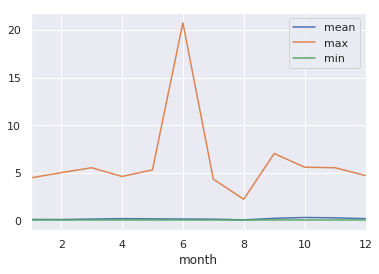

In [35]:
m_precipIntensity.plot()

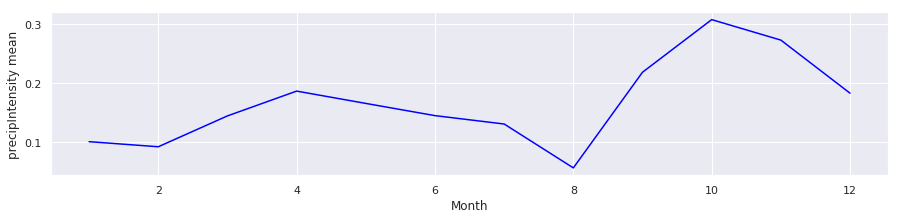

In [36]:
fig, ax = plt.subplots(figsize=(15,3))
sns.set(font_scale=1.4)
plt.plot(m_precipIntensity.index, m_precipIntensity['mean'],color='blue')
plt.xlabel('Month');
plt.ylabel('precipIntensity mean');

In [37]:
#### calculated mean precipIntensity by year
y_precipIntensity=accidents_All[['year','precipIntensity']].groupby('year').agg(['mean','max','min'])
y_precipIntensity.columns=['mean','max','min']
y_precipIntensity

,mean,max,min
year,,,
2015,0.000000,0.000,0.0
2016,0.000000,0.000,0.0
2017,0.000000,0.000,0.0
2018,0.298665,5.591,0.0
2019,0.634511,20.754,0.0


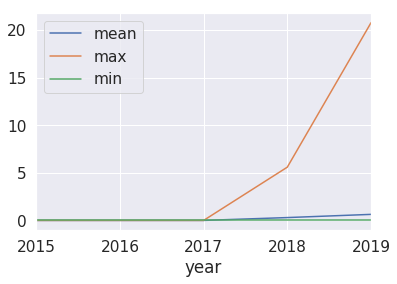

In [38]:
y_precipIntensity.plot()

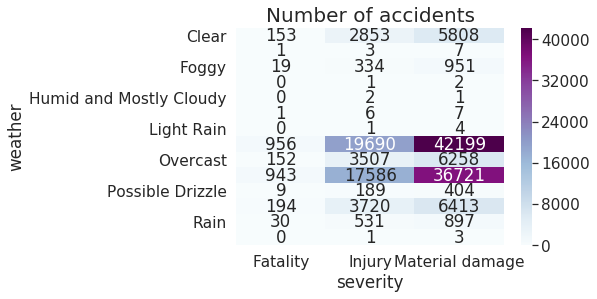

In [39]:
# relation into severity and weather
cross_ws=pd.crosstab(accidents_All.summary,accidents_All.severity)
map1 = sns.heatmap(cross_ws, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('severity')
plt.ylabel('weather')
plt.yticks(rotation=0)
plt.show()

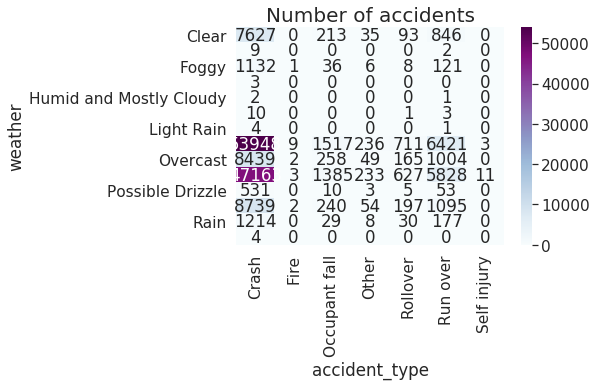

In [40]:
# relation into type and weather
cross_wt=pd.crosstab(accidents_All.summary,accidents_All.accident_type)
map1 = sns.heatmap(cross_wt, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('accident_type')
plt.ylabel('weather')
plt.yticks(rotation=0)
plt.show()

In [41]:
# number of accidents by seveirty
severity=pd.DataFrame(accidents_All.severity.value_counts()).reset_index(drop=False)
severity.columns=['severity','accidents']
severity

,severity,accidents
0,Material damage,106121
1,Injury,51880
2,Fatality,2622


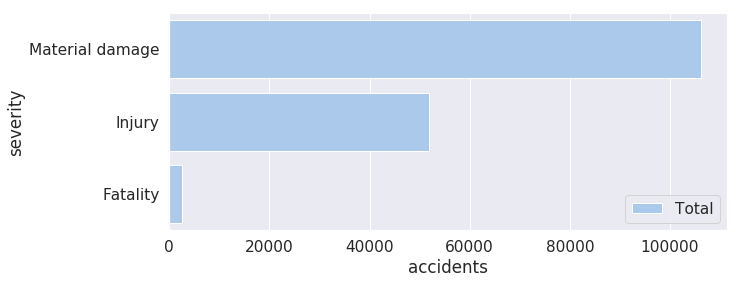

In [42]:
f, ax = plt.subplots(figsize=(10, 4))

sns.set_color_codes("pastel")
sns.barplot(x="accidents", y='severity', data=severity,
            label="Total", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)

In [43]:
# number of accidents by type
accident_type=pd.DataFrame(accidents_All.accident_type.value_counts()).reset_index(drop=False)
accident_type.columns=['accident_type','accidents']
accident_type

,accident_type,accidents
0,Crash,137402
1,Run over,16582
2,Occupant fall,3970
3,Rollover,1982
4,Other,654
5,Fire,19
6,Self injury,14


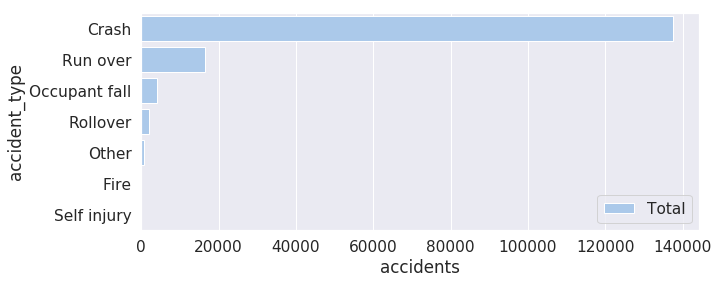

In [44]:
f, ax = plt.subplots(figsize=(10, 4))

sns.set_color_codes("pastel")
sns.barplot(x="accidents", y='accident_type', data=accident_type,
            label="Total", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)

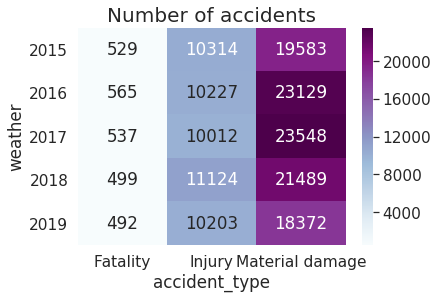

In [45]:
# relation into accidents type and weather
cross_sy=pd.crosstab(accidents_All.year,accidents_All.severity)
map1 = sns.heatmap(cross_sy, annot=True, fmt="d", cmap='BuPu')
plt.title('Number of accidents', fontsize=20)
plt.xlabel('accident_type')
plt.ylabel('weather')
plt.yticks(rotation=0)
plt.show()